# Session 7 - Module 3: Data Exploration & Analysis

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import scipy
import matplotlib as mpl
import matplotlib.pyplot as plt
import geopandas as gdp
import statsmodels as smd
from shapely.geometry import Point, Polygon
import descartes
from collections import Counter
import matplotlib.cm as cm
import statsmodels.api as sm

##### Dunkin Donuts locations across the United States

In [3]:
DunkinDonuts_DF = pd.read_csv('/home/rv76/RDMLA Course/Module 3 Files/dunkindonuts.csv')

In [4]:
DunkinDonuts_DF.head()

,id,address,city,state,zip,country,lat,lng
0,300176,1752B Route 9,Clifton Park,NY,12065,US,42.871739,-73.774136
1,300178,99 High St,Danvers,MA,1923,US,42.559575,-70.931239
2,300179,17 Railroad Ave,Rockport,MA,1966,US,42.656344,-70.626211
3,300202,411 Furrows Rd,Holbrook,NY,11741,US,40.806919,-73.072950
4,300204,140 Central Ave,East Orange,NJ,7018,US,40.752378,-74.207983


In [5]:
np.shape(DunkinDonuts_DF)

(7794, 8)

##### Zip Codes of Boston, MA

In [6]:
Zip_Codes_DF = pd.read_csv('/home/rv76/RDMLA Course/Module 3 Files/ZIP_Codes.csv').set_index('OBJECTID')

In [7]:
Zip_Codes_DF.head()

,ZIP5,ShapeSTArea,ShapeSTLength
OBJECTID,,,
1,2134,3.721936e+07,40794.182396
2,2125,6.476052e+07,62224.521440
3,2110,6.637284e+06,18358.213496
4,2118,3.116158e+07,32353.407618
5,2126,6.078585e+07,45488.394711


In [8]:
np.shape(Zip_Codes_DF)

(43, 3)

##### Dunkin Donuts locations in Boston Zip Codes

In [9]:
Boston_dunkin_location_filter = []

for dunkin_location_zip in list(DunkinDonuts_DF.zip):
    
    if dunkin_location_zip in list(Zip_Codes_DF.ZIP5):
        
        Boston_dunkin_location_filter.append(True)
        
    else:
        
        Boston_dunkin_location_filter.append(False)

In [10]:
DunkinDonuts_Boston_DF = DunkinDonuts_DF[Boston_dunkin_location_filter]

In [11]:
DunkinDonuts_Boston_DF.head()

,id,address,city,state,zip,country,lat,lng
5,300205,22 Washington St,Canton,MA,2021,US,42.139105,-71.148928
16,300240,13-15 Maverick Sq,East Boston,MA,2128,US,42.369062,-71.039333
50,300304,395 Providence Hwy,Dedham,MA,2026,US,42.250106,-71.171922
51,300305,214 N. Beacon St,Brighton,MA,2135,US,42.356017,-71.149212
56,300314,875 Morrissey Blvd,Dorchester,MA,2122,US,42.293589,-71.048325


In [12]:
np.shape(DunkinDonuts_Boston_DF)

(150, 8)

##### Mapping Boston Zip Codes

In [13]:
crs = {'init':'epsg:4326'} #have to specify a coordinate reference system

In [14]:
Boston_ZipCode_geography_df = gdp.read_file("/home/rv76/RDMLA Course/Module 3 Files/ZIP_Codes.geojson").set_index('OBJECTID')

Boston_ZipCode_geography_df = Boston_ZipCode_geography_df.to_crs(crs)

In [15]:
Boston_ZipCode_geography_df.head()

,ZIP5,ShapeSTArea,ShapeSTLength,geometry
OBJECTID,,,,
1,02134,3.721936e+07,40794.182396,POLYGON ((-71.12340461235523 42.36420867214283...
2,02125,6.476052e+07,62224.521440,POLYGON ((-71.04541458491363 42.32380666715233...
3,02110,6.637284e+06,18358.213496,POLYGON ((-71.05109058896998 42.36418367507441...
4,02118,3.116158e+07,32353.407618,POLYGON ((-71.06315159137533 42.34688867055895...
5,02126,6.078585e+07,45488.394711,POLYGON ((-71.09669659978795 42.29095065982932...


In [16]:
np.shape(Boston_ZipCode_geography_df)

(43, 4)

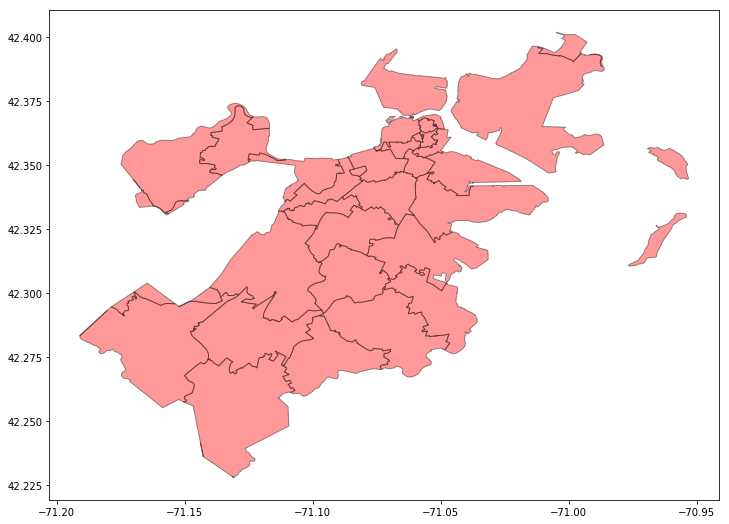

In [17]:
fig , ax = plt.subplots(figsize=(12, 12))

Boston_ZipCode_geography_df.plot(ax = ax, color = 'r' , alpha = 0.4 , edgecolor = 'k')

##### Mapping Boston Dunkin Donuts locations

In [18]:
Boston_dunkin_donuts_locations_points = [Point(x,y) for x,y in zip( DunkinDonuts_Boston_DF['lng'] , DunkinDonuts_Boston_DF['lat'] ) ]

Boston_dunkin_donuts_locations_geography_df = gdp.GeoDataFrame(DunkinDonuts_Boston_DF , crs = crs , geometry = Boston_dunkin_donuts_locations_points)

In [19]:
Boston_dunkin_donuts_locations_geography_df.head()

,id,address,city,state,zip,country,lat,lng,geometry
5,300205,22 Washington St,Canton,MA,2021,US,42.139105,-71.148928,POINT (-71.148928 42.139105)
16,300240,13-15 Maverick Sq,East Boston,MA,2128,US,42.369062,-71.039333,POINT (-71.039333 42.369062)
50,300304,395 Providence Hwy,Dedham,MA,2026,US,42.250106,-71.171922,POINT (-71.171922 42.250106)
51,300305,214 N. Beacon St,Brighton,MA,2135,US,42.356017,-71.149212,POINT (-71.14921200000001 42.356017)
56,300314,875 Morrissey Blvd,Dorchester,MA,2122,US,42.293589,-71.048325,POINT (-71.04832500000001 42.293589)


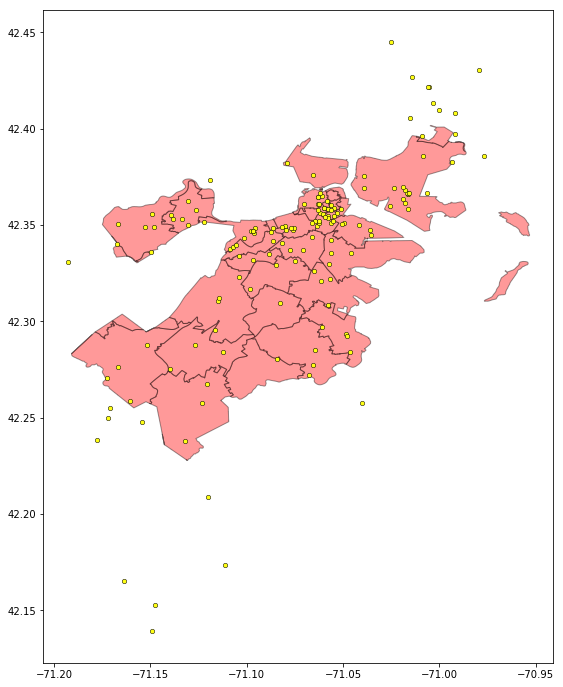

In [20]:
fig , ax = plt.subplots(figsize=(12, 12))

#plot Zip Codes
Boston_ZipCode_geography_df.plot(ax = ax, color = 'r' , alpha = 0.4 , edgecolor = 'k')

#plot Dunkin Donuts Locations
Boston_dunkin_donuts_locations_geography_df.plot(ax = ax, markersize = 20, color = 'xkcd:yellow' , marker = "o" , edgecolor = 'k' , linewidth = 0.5)


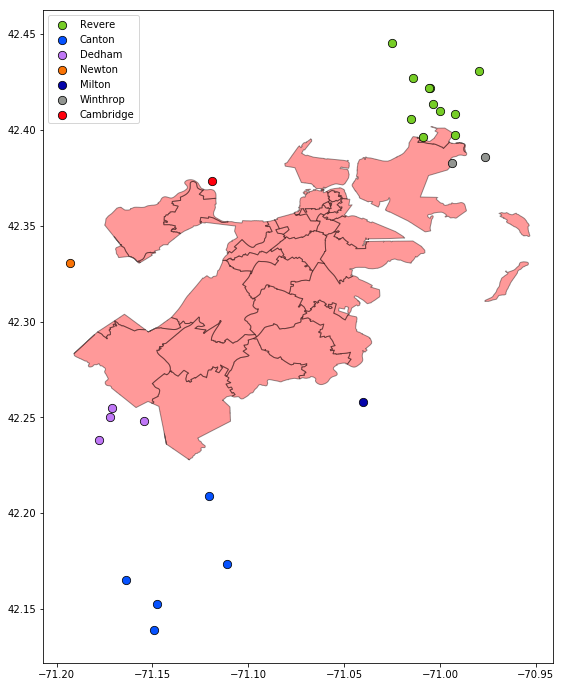

In [21]:
fig , ax = plt.subplots(figsize=(12, 12))

#plot Zip Codes
Boston_ZipCode_geography_df.plot(ax = ax, color = 'r' , alpha = 0.4 , edgecolor = 'k')

#plot Dunkin Donuts locations that aren't located in Boston proper
rev_loc = Boston_dunkin_donuts_locations_geography_df[Boston_dunkin_donuts_locations_geography_df.city == 'Revere'].plot(ax = ax, markersize = 70, color = 'xkcd:apple green' , marker = "o" , edgecolor = 'k' , linewidth = 0.75 , label = 'Revere')
can_loc = Boston_dunkin_donuts_locations_geography_df[Boston_dunkin_donuts_locations_geography_df.city == 'Canton'].plot(ax = ax, markersize = 70, color = 'xkcd:electric blue' , marker = "o" , edgecolor = 'k' , linewidth = 0.75 , label = 'Canton')
ded_loc = Boston_dunkin_donuts_locations_geography_df[Boston_dunkin_donuts_locations_geography_df.city == 'Dedham'].plot(ax = ax, markersize = 70, color = 'xkcd:light purple' , marker = "o" , edgecolor = 'k' , linewidth = 0.75 , label = 'Dedham')
new_loc = Boston_dunkin_donuts_locations_geography_df[Boston_dunkin_donuts_locations_geography_df.city == 'Newton'].plot(ax = ax, markersize = 70, color = 'xkcd:orange' , marker = "o" , edgecolor = 'k' , linewidth = 0.75 , label = 'Newton')
mil_loc = Boston_dunkin_donuts_locations_geography_df[Boston_dunkin_donuts_locations_geography_df.city == 'Milton'].plot(ax = ax, markersize = 70, color = 'xkcd:royal blue' , marker = "o" , edgecolor = 'k' , linewidth = 0.75 , label = 'Milton')
win_loc = Boston_dunkin_donuts_locations_geography_df[Boston_dunkin_donuts_locations_geography_df.city == 'Winthrop'].plot(ax = ax, markersize = 70, color = 'xkcd:grey' , marker = "o" , edgecolor = 'k' , linewidth = 0.75 , label = 'Winthrop')
cam_loc = Boston_dunkin_donuts_locations_geography_df[Boston_dunkin_donuts_locations_geography_df.city == 'Cambridge'].plot(ax = ax, markersize = 70, color = 'xkcd:bright red' , marker = "o" , edgecolor = 'k' , linewidth = 0.75 , label = 'Cambridge')

#legend
plt.legend()

##### Getting rid of Dunkin Donuts locations that aren't in Boston Proper

Our first pass showed that our Zip Code list contained zip codes from Revere, Canton, Dedham, Newton, Milton, Winthrop & Cambridge. Since we're interested in the Dunkin Donuts concentration for Boston proper, we're going to drop these zip codes (and corresponding locations) from our analysis.

In [22]:
cities_not_part_of_Boston = ['Revere' , 'Canton' , 'Dedham' , 'Newton' , 'Milton' , 'Winthrop' , 'Cambridge']

#list that will store zip codes corresponding to the cities above
zip_codes_not_in_Boston = []

#create a boolean filter to subset our Dunkin Donuts locations DataFrame to locations in Boston Proper
DD_locations_df_zip_codes_in_Boston_filter = []

#iterate across all Dunkin Donuts locations
for zip_code , city in zip(Boston_dunkin_donuts_locations_geography_df.zip , Boston_dunkin_donuts_locations_geography_df.city): 

    #if the city is in the list of cities that are not part of Boston proper
    if city in cities_not_part_of_Boston:
        
        zip_codes_not_in_Boston.append(zip_code)
        DD_locations_df_zip_codes_in_Boston_filter.append(False)
        
    #otherwise city should be in Boston proper
    else:
        DD_locations_df_zip_codes_in_Boston_filter.append(True)
        
#for Zip Codes not in Boston, we can get rid of copies
zip_codes_not_in_Boston = list(set(zip_codes_not_in_Boston))

In [23]:
zip_codes_not_in_Boston

[2021, 2151, 2152, 2026, 2186, 2163, 2459]

Subset our Boston Dunkin Donuts locations goegraphy DataFrame to those locations in Boston Proper

In [24]:
Boston_proper_dunkin_donuts_locations_geography_df = Boston_dunkin_donuts_locations_geography_df[DD_locations_df_zip_codes_in_Boston_filter]

In [25]:
np.shape(Boston_proper_dunkin_donuts_locations_geography_df) #went from 150 locations to 125 locations in Boston, dropped 25 locations not in Boston proper

(125, 9)

In [26]:
Boston_proper_dunkin_donuts_locations_geography_df.head()

,id,address,city,state,zip,country,lat,lng,geometry
16,300240,13-15 Maverick Sq,East Boston,MA,2128,US,42.369062,-71.039333,POINT (-71.039333 42.369062)
51,300305,214 N. Beacon St,Brighton,MA,2135,US,42.356017,-71.149212,POINT (-71.14921200000001 42.356017)
56,300314,875 Morrissey Blvd,Dorchester,MA,2122,US,42.293589,-71.048325,POINT (-71.04832500000001 42.293589)
100,300417,715 Boylston St,Boston,MA,2116,US,42.349561,-71.079929,POINT (-71.07992900000001 42.349561)
200,300660,4175 Washington St,Roslindale,MA,2131,US,42.287906,-71.126892,POINT (-71.126892 42.287906)


Subset our Boston Zip Code geography DataFrame to those Zip Codes in Boston Proper

In [27]:
Boston_ZipCode_geography_df_zip_codes_in_Boston_filter = [ int(zip_code) not in zip_codes_not_in_Boston for zip_code in Boston_ZipCode_geography_df.ZIP5]
Boston_proper_ZipCode_geography_df = Boston_ZipCode_geography_df[Boston_ZipCode_geography_df_zip_codes_in_Boston_filter]

In [28]:
np.shape(Boston_proper_ZipCode_geography_df) #went from 43 zip codes to 36 zip codes in Boston, dopped the 7 zip codes not in Boston proper

(36, 4)

In [29]:
Boston_proper_ZipCode_geography_df.head()

,ZIP5,ShapeSTArea,ShapeSTLength,geometry
OBJECTID,,,,
1,02134,3.721936e+07,40794.182396,POLYGON ((-71.12340461235523 42.36420867214283...
2,02125,6.476052e+07,62224.521440,POLYGON ((-71.04541458491363 42.32380666715233...
3,02110,6.637284e+06,18358.213496,POLYGON ((-71.05109058896998 42.36418367507441...
4,02118,3.116158e+07,32353.407618,POLYGON ((-71.06315159137533 42.34688867055895...
5,02126,6.078585e+07,45488.394711,POLYGON ((-71.09669659978795 42.29095065982932...


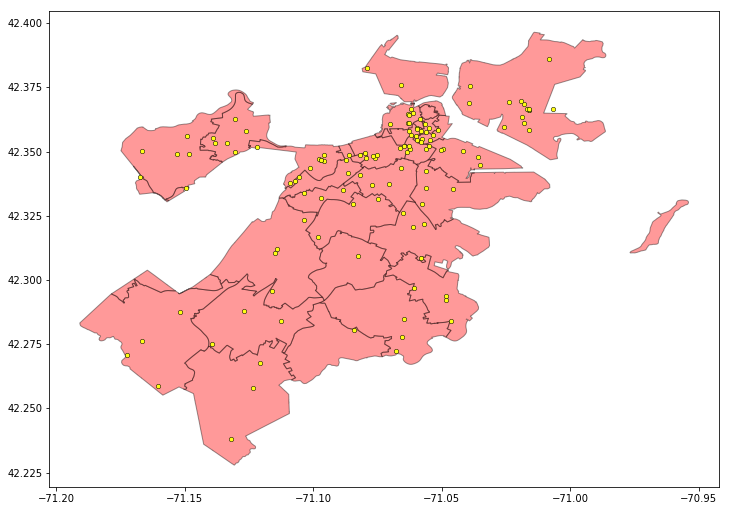

In [30]:
fig , ax = plt.subplots(figsize=(12, 12))

#plot Zip Codes
Boston_proper_ZipCode_geography_df.plot(ax = ax, color = 'r' , alpha = 0.4 , edgecolor = 'k')

#plot Dunkin Donuts Locations
Boston_proper_dunkin_donuts_locations_geography_df.plot(ax = ax, markersize = 20, color = 'xkcd:yellow' , marker = "o" , edgecolor = 'k' , linewidth = 0.5)

##### How many Dunkin Donuts locations are there in each Zip Code?

In [31]:
Boston_proper_ZipCode_geography_df.head()

,ZIP5,ShapeSTArea,ShapeSTLength,geometry
OBJECTID,,,,
1,02134,3.721936e+07,40794.182396,POLYGON ((-71.12340461235523 42.36420867214283...
2,02125,6.476052e+07,62224.521440,POLYGON ((-71.04541458491363 42.32380666715233...
3,02110,6.637284e+06,18358.213496,POLYGON ((-71.05109058896998 42.36418367507441...
4,02118,3.116158e+07,32353.407618,POLYGON ((-71.06315159137533 42.34688867055895...
5,02126,6.078585e+07,45488.394711,POLYGON ((-71.09669659978795 42.29095065982932...


In [32]:
#count the number of times each zip code appears in our Dunkin Donuts locations DataFrame
num_DD_locations_per_zip_code = [] 

#iterate through each Zip Code and count number of DD locations
for zip_code in Boston_proper_ZipCode_geography_df.ZIP5:
    
    #creates a boolean list and counts the number of 'True' values
    num_DD_locations_in_zip_code = sum( Boston_proper_dunkin_donuts_locations_geography_df.zip == int(zip_code) )
    
    #store in list
    num_DD_locations_per_zip_code.append(num_DD_locations_in_zip_code)
    
#append as an extra column to our Zip Code geography dataframe
Boston_proper_ZipCode_geography_df['num_DD_locs'] = num_DD_locations_per_zip_code

We now have a column with the number of Dunkin' Donuts locations in each zip code

In [33]:
Boston_proper_ZipCode_geography_df.sort_values(by = 'num_DD_locs' , ascending = False).head()

,ZIP5,ShapeSTArea,ShapeSTLength,geometry,num_DD_locs
OBJECTID,,,,,
31,02128,1.478022e+08,82747.690323,POLYGON ((-71.00401557482661 42.39259768188811...,17
19,02114,1.253863e+07,27934.531421,(POLYGON ((-71.06477655711508 42.3688235992911...,9
29,02215,2.519831e+07,37861.731305,"POLYGON ((-71.1180406109942 42.35392767031027,...",8
24,02116,1.911765e+07,23262.912273,(POLYGON ((-71.07569259644669 42.3560736722407...,7
1,02134,3.721936e+07,40794.182396,POLYGON ((-71.12340461235523 42.36420867214283...,6


##### Heatmap that illustrates how many Dunkin' Donuts locations are in each zip code

We're going to plot each zip code individually and it's color will scale with how many DD locations there are within the zip code

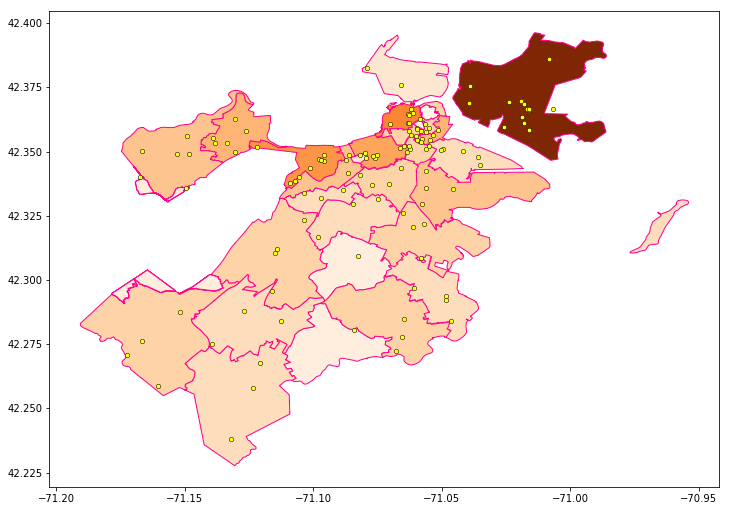

In [34]:
fig , ax = plt.subplots(figsize=(12, 12))

cmap = mpl.cm.get_cmap('Oranges')
norm = mpl.colors.Normalize(vmin = np.min(Boston_proper_ZipCode_geography_df.num_DD_locs) , vmax = np.max(Boston_proper_ZipCode_geography_df.num_DD_locs))

#plot Zip Codes 1-by-1
for zip_code , num_DD_locations in zip( Boston_proper_ZipCode_geography_df.ZIP5 , Boston_proper_ZipCode_geography_df.num_DD_locs ):
    
    Boston_proper_ZipCode_geography_df[Boston_proper_ZipCode_geography_df.ZIP5 == zip_code].plot(ax = ax, color = cmap(norm(num_DD_locations)) , edgecolor = 'xkcd:hot pink')

#plot Dunkin Donuts Locations
Boston_proper_dunkin_donuts_locations_geography_df.plot(ax = ax, markersize = 20, color = 'xkcd:yellow' , marker = "o" , edgecolor = 'k' , linewidth = 0.5)

Removing the locations, adding a legend and a few other changes makes the figure look a bit cleaner

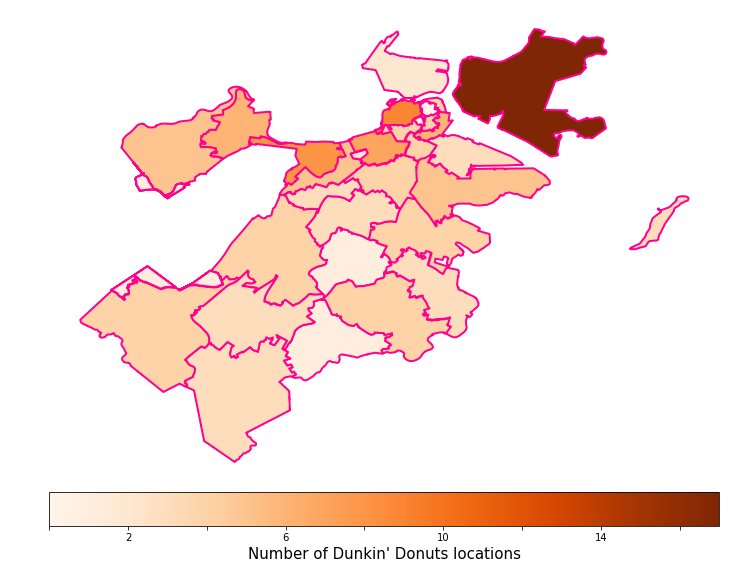

In [35]:
fig , ax = plt.subplots(figsize=(12, 17.0))

cmap = mpl.cm.get_cmap('Oranges')
norm = mpl.colors.Normalize(vmin = np.min(Boston_proper_ZipCode_geography_df.num_DD_locs) , vmax = np.max(Boston_proper_ZipCode_geography_df.num_DD_locs))

#plot Zip Codes 1-by-1
for zip_code , num_DD_locations in zip( Boston_proper_ZipCode_geography_df.ZIP5 , Boston_proper_ZipCode_geography_df.num_DD_locs ):
    
    Boston_proper_ZipCode_geography_df[Boston_proper_ZipCode_geography_df.ZIP5 == zip_code].plot(ax = ax, color = cmap(norm(num_DD_locations)) , edgecolor = 'xkcd:hot pink' , linewidth = 1.6)
    
# setup the colorbar
scalarmappaple = cm.ScalarMappable(norm = norm, cmap = cmap)
scalarmappaple.set_array(Boston_proper_ZipCode_geography_df.num_DD_locs)
cbar = plt.colorbar(scalarmappaple , ax = ax , orientation = 'horizontal' , pad = 0.01)
cbar.set_label('Number of Dunkin\' Donuts locations' , fontsize = 15)
for label in cbar.ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)

plt.axis('off')
plt.show()

##### Normalize each zip code by population in each zip code (get the number of DD locations in each zip code per 100,000 people)

In [36]:
#load in CSV file that contains population estimate for each zip code in MA from the American Community Survey
MA_pop_per_zip_code_df = pd.read_csv('/home/rv76/RDMLA Course/Module 3 Files/MA_population_per_ZipCode.csv' , names = ['zip_code' , 'population'] , header = 1)

#have to re-format zip code column
zip_codes = [zip_code.split(' ')[1] for zip_code in MA_pop_per_zip_code_df.zip_code]
MA_pop_per_zip_code_df['zip_code'] = zip_codes

#covert to a pandas series
MA_pop_per_zip_code = pd.Series(data = list(MA_pop_per_zip_code_df.population) , index = MA_pop_per_zip_code_df.zip_code)

In [37]:
MA_pop_per_zip_code.head()

zip_code
01001    17537
01002    30280
01003    11131
01005     5014
01007    14906
dtype: int64

Add the population of each Zip Code to our DataFrame with Boston Zip Codes

In [38]:
#store the population estimate for each zip code in a list
population_per_zip_code = []

#iterate through each Zip Code and get the population estimate from the MA zip code populatin estimates
for zip_code in Boston_proper_ZipCode_geography_df.ZIP5:
    
    #gets the population estimate from pandas series with zip codes and population estimates
    population_for_zip_code = MA_pop_per_zip_code[zip_code]
    
    #store in list
    population_per_zip_code.append(population_for_zip_code)
    
#append as an extra column to our Zip Code geography dataframe
Boston_proper_ZipCode_geography_df['population'] = population_per_zip_code

We now have a column with the number of people living in each zip code

In [39]:
Boston_proper_ZipCode_geography_df.sort_values(by = 'population' , ascending = False).head()

,ZIP5,ShapeSTArea,ShapeSTLength,geometry,num_DD_locs,population
OBJECTID,,,,,,
17,02124,8.565805e+07,57673.007747,POLYGON ((-71.07201159209339 42.30147266184732...,4,55074
31,02128,1.478022e+08,82747.690323,POLYGON ((-71.00401557482661 42.39259768188811...,17,46655
14,02135,7.862083e+07,61170.630938,POLYGON ((-71.12739238900468 42.37312206431073...,5,42644
9,02130,1.052212e+08,64225.022210,POLYGON ((-71.10796069160388 42.28861726142425...,4,39435
26,02127,6.753614e+07,51905.251635,(POLYGON ((-71.05289058794612 42.3467076716215...,5,37257


We can create another column that divides the number of Dunkin' Donuts locations by the population in each Zip Code and then multiplies that by 100,000

In [40]:
Boston_proper_ZipCode_geography_df['num_DD_locs_norm'] = Boston_proper_ZipCode_geography_df['num_DD_locs'] / Boston_proper_ZipCode_geography_df['population']
Boston_proper_ZipCode_geography_df['num_DD_locs_norm'] = Boston_proper_ZipCode_geography_df['num_DD_locs_norm'] * 100000

In [41]:
Boston_proper_ZipCode_geography_df.sort_values(by = 'num_DD_locs_norm' , ascending = False).head()

,ZIP5,ShapeSTArea,ShapeSTLength,geometry,num_DD_locs,population,num_DD_locs_norm
OBJECTID,,,,,,,
3,02110,6.637284e+06,18358.213496,POLYGON ((-71.05109058896998 42.36418367507441...,6,2270,264.317181
15,02199,1.603177e+06,5140.730822,POLYGON ((-71.08177559749514 42.34539467017218...,2,1177,169.923534
23,02210,3.237321e+07,36215.564018,"POLYGON ((-71.03731802079329 42.3430552209194,...",3,2609,114.986585
6,02109,5.536731e+06,22538.305842,"POLYGON ((-71.0578097756009 42.35678987901324,...",4,4051,98.741052
20,02108,6.162153e+06,18485.040129,(POLYGON ((-71.05928359112316 42.3592296738039...,4,4211,94.989314


We can now re-create our heatmap with the number of Dunkin' locations in each zip code normalized by the number of people that live there

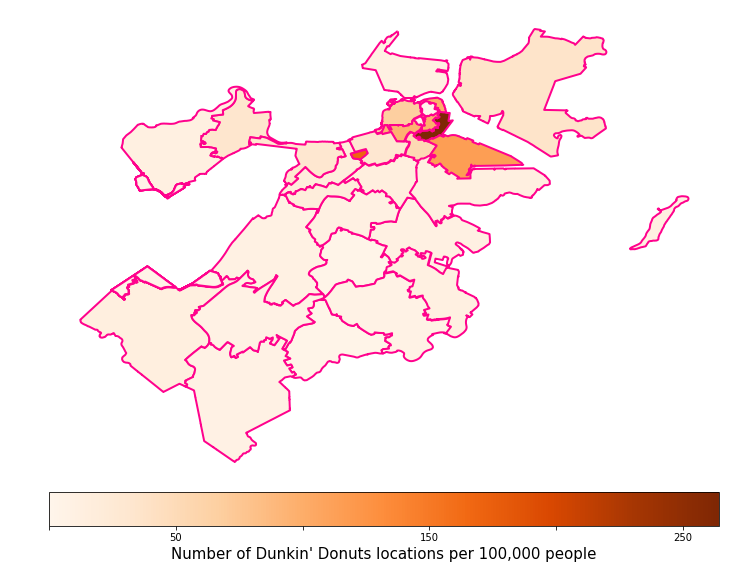

In [42]:
fig , ax = plt.subplots(figsize=(12, 17.0))

cmap = mpl.cm.get_cmap('Oranges')
norm = mpl.colors.Normalize(vmin = np.min(Boston_proper_ZipCode_geography_df.num_DD_locs_norm) , vmax = np.max(Boston_proper_ZipCode_geography_df.num_DD_locs_norm))

#plot Zip Codes 1-by-1
for zip_code , num_DD_locations_normalized in zip( Boston_proper_ZipCode_geography_df.ZIP5 , Boston_proper_ZipCode_geography_df.num_DD_locs_norm ):
    
    Boston_proper_ZipCode_geography_df[Boston_proper_ZipCode_geography_df.ZIP5 == zip_code].plot(ax = ax, color = cmap(norm(num_DD_locations_normalized)) , edgecolor = 'xkcd:hot pink' , linewidth = 1.6)
    
# setup the colorbar
scalarmappaple = cm.ScalarMappable(norm = norm, cmap = cmap)
scalarmappaple.set_array(Boston_proper_ZipCode_geography_df.num_DD_locs_norm)
cbar = plt.colorbar(scalarmappaple , ax = ax , orientation = 'horizontal' , pad = 0.01)
cbar.set_label('Number of Dunkin\' Donuts locations per 100,000 people' , fontsize = 15)
for label in cbar.ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)

plt.axis('off')
plt.show()

The winner is clearly 02110, which corresponds to Downtown Crossing, Financial District and the New England Aquarium! 

There seems to be a few zip codes with a very high concentration of Dunkin' Donuts per capita, which makes it difficult to see how the other zip codes compare. So let's plot the heat map on a log scale.

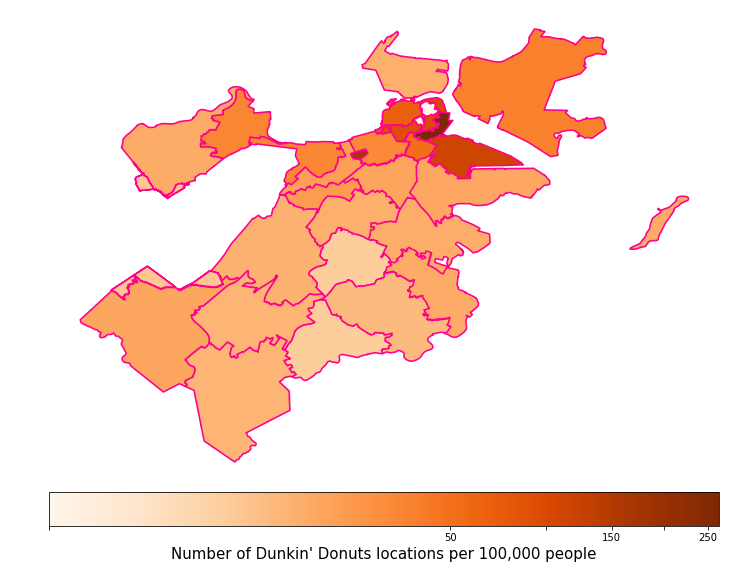

In [43]:
fig , ax = plt.subplots(figsize=(12, 17.0))

cmap = mpl.cm.get_cmap('Oranges')
norm = mpl.colors.PowerNorm(gamma=1.0/3.25 , vmin = np.min(Boston_proper_ZipCode_geography_df.num_DD_locs_norm) , vmax = np.max(Boston_proper_ZipCode_geography_df.num_DD_locs_norm))

#plot Zip Codes 1-by-1
for zip_code , num_DD_locations_normalized in zip( Boston_proper_ZipCode_geography_df.ZIP5 , Boston_proper_ZipCode_geography_df.num_DD_locs_norm ):
    
    Boston_proper_ZipCode_geography_df[Boston_proper_ZipCode_geography_df.ZIP5 == zip_code].plot(ax = ax, color = cmap(norm(num_DD_locations_normalized)) , edgecolor = 'xkcd:hot pink' , linewidth = 1.6)
    
# setup the colorbar
scalarmappaple = cm.ScalarMappable(norm = norm, cmap = cmap)
scalarmappaple.set_array(Boston_proper_ZipCode_geography_df.num_DD_locs_norm)
cbar = plt.colorbar(scalarmappaple , ax = ax , orientation = 'horizontal' , pad = 0.01)
cbar.set_label('Number of Dunkin\' Donuts locations per 100,000 people' , fontsize = 15)
for label in cbar.ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)

plt.axis('off')
plt.savefig('/home/rv76/RDMLA Course/Dunkin_density_in_Boston.eps', format='eps', dpi=1000)
plt.show()

##### DD per 100,000 vs. Mean Household Income

In [44]:
#load in CSV file that contains population estimate for each zip code in MA from the American Community Survey
MA_mean_income_per_zip_code_df = pd.read_csv('/home/rv76/RDMLA Course/Module 3 Files/MA_mean_income_per_zip_code.csv' , names = ['zip_code' , 'mean_income'] , header = 1)

#have to re-format zip code column
zip_codes = [zip_code.split(' ')[1] for zip_code in MA_mean_income_per_zip_code_df.zip_code]
MA_mean_income_per_zip_code_df['zip_code'] = zip_codes

#covert to a pandas series
MA_mean_income_per_zip_code = pd.Series(data = list(MA_mean_income_per_zip_code_df.mean_income) , index = MA_mean_income_per_zip_code_df.zip_code)

In [45]:
MA_mean_income_per_zip_code.head()

zip_code
01001     74096
01002     80304
01003         N
01005     95958
01007    104812
dtype: object

Add the mean income of each Zip Code to our DataFrame with Boston Zip Codes

In [46]:
#store the population estimate for each zip code in a list
mean_income_per_zip_code = []

#iterate through each Zip Code and get the population estimate from the MA zip code populatin estimates
for zip_code in Boston_proper_ZipCode_geography_df.ZIP5:
    
    #gets the mean income from pandas series with zip codes and population estimates
    mean_income_for_zip_code = MA_mean_income_per_zip_code[zip_code]
    
    #store in list
    mean_income_per_zip_code.append(mean_income_for_zip_code)
    
#append as an extra column to our Zip Code geography dataframe
Boston_proper_ZipCode_geography_df['mean_income'] = mean_income_per_zip_code

We now have a column with the median household income in each zip code

In [47]:
Boston_proper_ZipCode_geography_df.sort_values(by = 'mean_income' , ascending = False).head()

,ZIP5,ShapeSTArea,ShapeSTLength,geometry,num_DD_locs,population,num_DD_locs_norm,mean_income
OBJECTID,,,,,,,,
28,02203,8.644668e+05,4052.846084,"POLYGON ((-71.058170591384 42.36228067393879, ...",0,27,0.000000,N
25,02131,8.168880e+07,68311.545122,POLYGON ((-71.12323660861837 42.29770965957496...,3,32819,9.141046,91960
21,02136,1.281290e+08,65353.757829,POLYGON ((-71.11594835790713 42.27635940281059...,3,33084,9.067827,79517
14,02135,7.862083e+07,61170.630938,POLYGON ((-71.12739238900468 42.37312206431073...,5,42644,11.724979,79397
2,02125,6.476052e+07,62224.521440,POLYGON ((-71.04541458491363 42.32380666715233...,4,35254,11.346230,74396


zip code 02203 (Boston City Hall, JFK Building, Government Center T & City Hall Plaza) has no mean income and even though this zip code has a recorded of 27 individuals from the ACS it might be an error and there may actually be 0 people residing in this zip code, so let's remove this from futher analysis.

In [48]:
Boston_proper_ZipCode_geography_df = Boston_proper_ZipCode_geography_df[Boston_proper_ZipCode_geography_df.ZIP5 != '02203']

Convert the mean income column to an integer type instead of a string type

In [49]:
Boston_proper_ZipCode_geography_df['mean_income'] = Boston_proper_ZipCode_geography_df['mean_income'].apply(pd.to_numeric)

In [50]:
Boston_proper_ZipCode_geography_df.head()

,ZIP5,ShapeSTArea,ShapeSTLength,geometry,num_DD_locs,population,num_DD_locs_norm,mean_income
OBJECTID,,,,,,,,
1,02134,3.721936e+07,40794.182396,POLYGON ((-71.12340461235523 42.36420867214283...,6,18057,33.228111,69218
2,02125,6.476052e+07,62224.521440,POLYGON ((-71.04541458491363 42.32380666715233...,4,35254,11.346230,74396
3,02110,6.637284e+06,18358.213496,POLYGON ((-71.05109058896998 42.36418367507441...,6,2270,264.317181,256500
4,02118,3.116158e+07,32353.407618,POLYGON ((-71.06315159137533 42.34688867055895...,4,27325,14.638609,129325
5,02126,6.078585e+07,45488.394711,POLYGON ((-71.09669659978795 42.29095065982932...,1,29141,3.431591,66689


##### Run OLS Regression by Regressing *log( DD locations per 100,000 people)* on *Mean Income*

In [51]:
#store the values in a dependent and independent vector 
Y = Boston_proper_ZipCode_geography_df.num_DD_locs_norm
X = Boston_proper_ZipCode_geography_df.mean_income
X = sm.add_constant(X)

#run the OLS with statsmodels
model = sm.OLS(Y , X)
results = model.fit()

#store the fitted parameters from the regression
constant_from_OLS = results.params[0]
coeff_from_OLS = results.params[1]

#create a vector for the line using the output parameters from the OLS regression
X_values_line_best_fit = np.arange( min(Boston_proper_ZipCode_geography_df.mean_income) , max(Boston_proper_ZipCode_geography_df.mean_income) , 1)
Y_values_line_best_fit = coeff_from_OLS * X_values_line_best_fit + constant_from_OLS

In [52]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       num_DD_locs_norm   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     11.47
Date:                Fri, 19 Apr 2019   Prob (F-statistic):            0.00184
Time:                        12:38:45   Log-Likelihood:                -184.30
No. Observations:                  35   AIC:                             372.6
Df Residuals:                      33   BIC:                             375.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -27.6037     20.053     -1.377      0.178     -68.401      13.194
mean_income     0.0005      0.000      3.387      0.002       0.000       0.001
==============================================================================
Omnibus:                       18.258   Durbin-Watson:                   1.534
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.070
Skew:                           1.378   Prob(JB):                     2.18e-06
Kurtosis:                       6.206   Cond. No.                     3.42e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.42e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

coefficient of DD locations per 100,000 regressed on Mean Income

In [53]:
results.params[1]

0.0004886600397916779

p-value for coefficient

In [54]:
results.pvalues[1]

0.0018439678630164536

##### Plot results of regression

In [55]:
plt.style.use('ggplot')
plt.rcParams['lines.linewidth']=0
plt.rcParams['axes.facecolor']='1.0'
plt.rcParams['xtick.color']='black'
plt.rcParams['axes.grid']=False
plt.rcParams['axes.edgecolor']='black'
plt.rcParams['grid.color']= '1.0'
plt.rcParams.update({'font.size': 14})

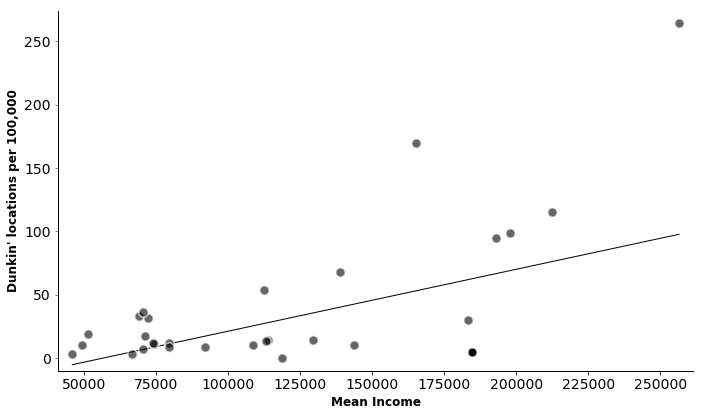

In [56]:
fig , ax = plt.subplots()

plt.scatter( Boston_proper_ZipCode_geography_df.mean_income , Boston_proper_ZipCode_geography_df.num_DD_locs_norm , color = '0.0' , edgecolor = 'white' , linewidth = 1.75 , alpha = 0.6 , s = 90)

#plot Line of Best Fit from OLS regression
plt.plot(X_values_line_best_fit , Y_values_line_best_fit , color = '0.0' , linestyle = '-' , linewidth = 1.0 , zorder=0 , alpha = 1.0)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.tick_params(labelcolor = 'k')
ax.set_ylim([min( Boston_proper_ZipCode_geography_df.num_DD_locs_norm ) - 10 , max( Boston_proper_ZipCode_geography_df.num_DD_locs_norm ) + 10])
ax.set_xlim([min( Boston_proper_ZipCode_geography_df.mean_income ) - 5000 , max( Boston_proper_ZipCode_geography_df.mean_income ) + 5000])
plt.ylabel('Dunkin\' locations per 100,000' , fontweight = 'bold', fontsize = 12 , color = 'k')
plt.xlabel('Mean Income' , fontweight = 'bold', fontsize = 12 , color = 'k')

fig = plt.gcf()
fig.set_size_inches(10.0, 6.0)
fig.tight_layout()

#plt.show()